<img src="https://hub.jhu.edu/assets/uploads/sites/2/2020/03/covid-header-2400x605.jpg" alt="COVID-19">


# Modelo de predicción de propagación COVID-19 en países latinoamericanos
## Diplomado en Machine Learning
### Autor : Juan Carlos Condori Machicado (juanc.com@gmail.com)

#### Cargado de librerias necesarias

In [21]:
!pip3 install plotly
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

#### Enlaces datasets de series de tiempo por paises provistos por la Universidad Johns Hopkins University 

<img src="https://brand.jhu.edu/assets/uploads/sites/5/2014/06/university.logo_.small_.horizontal.blue_.jpg" alt="Logo Universidad"  width="400"> 

In [28]:
confimed_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
country_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"

Cargado de archivos: casos confirmados
Cargado de archivos: descesos
Cargado de archivos: casos recuperados
Cargado de archivos: casos por país


#### Almacenando los datasets dentro de dataframes 

In [29]:
confirmed_df = pd.read_csv(confimed_cases_file_link)
print(confirmed_df.shape)
deaths_df = pd.read_csv(death_cases_file_link)
print(deaths_df.shape)
recovered_df = pd.read_csv(recovered_cases_file_link)
print(recovered_df.shape)
cases_country_df = pd.read_csv(country_cases_file_link)
print(cases_country_df.shape)
print("Cargado de archivos: casos confirmados")
print("Cargado de archivos: descesos")
print("Cargado de archivos: casos recuperados")
print("Cargado de archivos: casos por país")

(266, 124)
(266, 124)
(253, 124)
(188, 14)
Cargado de archivos: casos confirmados
Cargado de archivos: descesos
Cargado de archivos: casos recuperados
Cargado de archivos: casos por país


#### Procesando datos

In [34]:
confirmed_df = confirmed_df.replace(np.nan, '', regex=True)
deaths_df = deaths_df.replace(np.nan, '', regex=True)
recovered_df = recovered_df.replace(np.nan, '', regex=True)
cases_country_df = cases_country_df.replace(np.nan, '', regex=True)

#### Visualizando las series de tiempo y se puede ver que se tienen las fechas desde '22/01/2020' hasta la hoy '20/05/2020'

In [38]:
print("Se puede ver las series de tiempo")
confirmed_df.columns


Se puede ver las series de tiempo


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/11/20', '5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20',
       '5/17/20', '5/18/20', '5/19/20', '5/20/20'],
      dtype='object', length=124)

## Analisís Exploratorio

#### Recuento de casos - resumen global

In [47]:
global_data = cases_country_df.copy().drop(['Lat','Long_','Country_Region','Last_Update', 'People_Hospitalized', 'People_Tested', 'ISO3'],axis =1)
global_summary = pd.DataFrame(global_data.sum()).transpose()
global_summary.style.format("{:,.0f}")

,Confirmed,Deaths,Recovered,Active,Mortality_Rate,UID
0,"5,075,181","331,103","1,936,331","2,806,714",688,"97,529"


#### Total de casos confirmados de coronavirus (globalmente)

In [49]:
confirmed_ts = confirmed_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1)
confirmed_ts_summary = confirmed_ts.sum()

In [53]:
fig_1 = go.Figure(data=go.Scatter(x=confirmed_ts_summary.index, y = confirmed_ts_summary.values, mode='lines+markers'))
fig_1.update_layout(title=' Total de casos confirmados de coronavirus (globalmente)',
                  yaxis_title='Casos confirmados', xaxis_tickangle = 315 )
fig_1.show()

### Función de trazado por colores

In [60]:
color_arr = px.colors.qualitative.Dark24

In [81]:
def draw_plot(ts_array, ts_label, title, colors, mode_size, line_size, x_axis_title , y_axis_title, tickangle = 0, yaxis_type = "", additional_annotations=[]):
    # initialize figure
    fig = go.Figure()
    # add all traces
    for index, ts in enumerate(ts_array):
        fig.add_trace(go.Scatter(x=ts.index,
                                 y = ts.values,
                                 name = ts_label[index],
                                 line=dict(color=colors[index], width=line_size[index]),connectgaps=True,))
    # base x_axis prop.
    x_axis_dict = dict(showline=True, 
                       showgrid=True, 
                       showticklabels=True, 
                       linecolor='rgb(204, 204, 204)', 
                       linewidth=2,
                       ticks='outside',
                       tickfont=dict(family='Arial',size=12,color='rgb(82, 82, 82)',))
    # setting x_axis params
    if x_axis_title:
        x_axis_dict['title'] = x_axis_title
    
    if tickangle > 0:
        x_axis_dict['tickangle'] = tickangle
    
    # base y_axis prop.
    y_axis_dict = dict(showline = True,
                       showgrid = True,
                       showticklabels=True,
                       linecolor='rgb(204, 204, 204)',
                       linewidth=2,)
    # setting y_axis params
    if yaxis_type != "":
        y_axis_dict['type'] = yaxis_type
    
    if y_axis_title:
        y_axis_dict['title'] = y_axis_title
        
#     # uncomment legend if you want to move the legend around
#     legend= dict(x=1,
#                  y=1,
#                  traceorder="normal",
#                  font=dict(family="sans-serif",size=12,color="black"),
#                  bgcolor="LightSteelBlue",
#                  bordercolor="Black",
#                  borderwidth=2)

#updating the layout
    fig.update_layout(xaxis = x_axis_dict,
                      yaxis = y_axis_dict,
                      autosize=True,
                      margin=dict(autoexpand=False,l=100,r=20,t=110,),
                      showlegend=True,
#                       legend = legend
                     )

    # base annotations for any graph
    annotations = []
    # Title
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom',
                                  text=title,
                                  font=dict(family='Arial',size=16,color='rgb(37,37,37)'),showarrow=False))
    # adding annotations in params
    if len(additional_annotations) > 0:
        annotations.append(additional_annotations)
    
    #updating the layout
    fig.update_layout(annotations=annotations)

    return fig

#### Estado de los casos Covid-19(Global)

In [142]:
confimed_agg_ts = confirmed_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()
death_agg_ts = deaths_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()
recovered_agg_ts = recovered_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()

#There is no timeseries data for Active cases, therefore it needs to be engineered separately
active_agg_ts = pd.Series(
    data=np.array(
        [x1 - x2 - x3  for (x1, x2, x3) in zip(confimed_agg_ts.values,death_agg_ts.values, recovered_agg_ts.values)]),
    index= confimed_agg_ts.index)

#Plot and add traces for all the aggregated timeseries

In [145]:
ts_array = [confimed_agg_ts, active_agg_ts, recovered_agg_ts, death_agg_ts]
labels = ['Confirmados', 'Activos', 'Recuperados', 'Descesos']
colors = [color_arr[5],  color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

# Calling the draw_plot function defined above
fig_2 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Estado de casos Covid-19(22/01/2020 to 19/05/2020)",
                  colors = colors, mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Fechas" , 
                  y_axis_title = "Conteo de casos", 
                  tickangle = 315, 
                  yaxis_type = "", additional_annotations=[])

fig_2.show()

####  Desglose a nivel de país(Global)

In [84]:
cases_country_df.copy().drop(
    ['Lat','Long_','Last_Update'],axis =1).sort_values('Confirmed', ascending= False).reset_index(drop=True).style.bar(
    align="left",width=98,color='#d65f5f')

### Enfoque Latinoamericano

In [130]:
print("Creamos nuevos dataframes de los paises latinoamericanos.")
latin_american_countries = ['Argentina','Bolivia','Brazil','Chile','Colombia','Costa Rica','Cuba','Ecuador','El Salvador','Guatemala','Haiti','Honduras','Mexico','Nicaragua','Panama','Paraguay','Peru','Dominican Republic','Uruguay','Venezuela']
# casos confirmados
latin_american_confirmed_df = confirmed_df[confirmed_df['Country/Region'].isin(latin_american_countries)]

# descesos
latin_american_deaths_df = deaths_df[deaths_df['Country/Region'].isin(latin_american_countries)]

# casos recuperados
latin_american_recovered_df = recovered_df[recovered_df['Country/Region'].isin(latin_american_countries)]

# casos por pais(paises latinoamericanos)
latin_american_cases_country_df = cases_country_df[cases_country_df['Country_Region'].isin(latin_american_countries)]

Creamos nuevos dataframes de los paises latinoamericanos.


In [140]:
pd.options.display.max_columns = None
latin_american_confirmed_df.head(20)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20
6,,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428,4532,4681,4783,4887,5020,5208,5371,5611,5776,6034,6278,6563,6879,7134,7479,7805,8068,8371,8809,9283
26,,Bolivia,-16.2902,-63.5887,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,10,10,11,11,12,12,15,19,24,27,29,32,43,61,74,81,97,107,115,123,132,139,157,183,194,210,264,268,275,300,330,354,397,441,465,493,520,564,598,609,703,807,866,950,1014,1053,1110,1167,1229,1470,1594,1681,1802,1886,2081,2266,2437,2556,2831,2964,3148,3372,3577,3826,4088,4263,4481,4919
28,,Brazil,-14.2350,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,4,4,13,13,20,25,31,38,52,151,151,162,200,321,372,621,793,1021,1546,1924,2247,2554,2985,3417,3904,4256,4579,5717,6836,8044,9056,10360,11130,12161,14034,16170,18092,19638,20727,22192,23430,25262,28320,30425,33682,36658,38654,40743,43079,45757,50036,54043,59324,63100,67446,73235,79685,87187,92202,97100,101826,108620,115455,126611,135773,146894,156061,162699,169594,178214,190137,203165,220291,233511,241080,255368,271885,291579
48,,Chile,-35.6751,-71.5430,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,4,4,8,8,13,23,23,43,61,74,155,201,238,238,434,537,632,746,922,1142,1306,1610,1909,2139,2449,2738,3031,3404,3737,4161,4471,4815,5116,5546,5972,6501,6927,7213,7525,7917,8273,8807,9252,9730,10088,10507,10832,11296,11812,12306,12858,13331,13813,14365,14885,16023,17008,18435,19663,20643,22016,23048,24581,25972,27219,28866,30063,31721,34381,37040,39542,41428,43781,46059,49579,53617
82,,Colombia,4.5709,-74.2973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,9,9,13,22,34,54,65,93,102,128,196,231,277,378,470,491,539,608,702,798,906,1065,1161,1267,1406,1485,1579,1780,2054,2223,2473,2709,2776,2852,2979,3105,3233,3439,3439,3792,3977,4149,4356,4561,4881,5142,5379,5597,5949,6207,6507,7006,7285,7668,7973,8613,8959,9456,10051,10495,11063,11613,12272,12930,13610,14216,14939,15574,16295,16935,17687
85,,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,9,9,13,22,23,26,27,35,41,50,69,89,117,134,158,177,201,231,263,295,314,330,347,375,396,416,435,454,467,483,502,539,558,577,595,612,618,626,642,649,655,660,662,669,681,686,687,693,695,697,705,713,719,725,733,739,742,755,761,765,773,780,792,801,804,815,830,843,853,863,866,882,897
89,,Cuba,22.0000,-80.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,4,4,4,5,7,11,16,21,35,40,48,57,67,80,119,139,170,186,212,233,269,288,320,350,396,457,515,564,620,669,726,766,814,862,923,986,1035,108

#### Recuento de casos - resumen enfoque Latinoamericano

In [136]:
latin_american_data = latin_american_cases_country_df.copy().drop(['Lat','Long_','Country_Region','Last_Update', 'People_Hospitalized', 'People_Tested', 'ISO3'],axis =1)
latin_american_global_summary = pd.DataFrame(latin_american_data.sum()).transpose()
latin_american_global_summary.style.format("{:,.0f}")

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,UID
0,"619,159","34,013","252,389","332,757","1,618",76,"7,081"


#### Total de casos confirmados de coronavirus (Latinoamérica)

In [137]:
latin_american_confirmed_ts = latin_american_confirmed_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1)
latin_american_confirmed_ts_summary = latin_american_confirmed_ts.sum()

In [138]:
fig_1 = go.Figure(data=go.Scatter(x=latin_american_confirmed_ts_summary.index, y = latin_american_confirmed_ts_summary.values, mode='lines+markers'))
fig_1.update_layout(title=' Total de casos confirmados de coronavirus (Latinoamérica)',
                  yaxis_title='Casos confirmados', xaxis_tickangle = 315 )
fig_1.show()

#### Estado de los casos Covid-19(Latinoamérica)

In [144]:
latin_american_confimed_agg_ts = latin_american_confirmed_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()
latin_american_death_agg_ts = latin_american_deaths_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()
latin_american_recovered_agg_ts = latin_american_recovered_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()

#There is no timeseries data for Active cases, therefore it needs to be engineered separately
latin_american_active_agg_ts = pd.Series(
    data=np.array(
        [x1 - x2 - x3  for (x1, x2, x3) in zip(latin_american_confimed_agg_ts.values,latin_american_death_agg_ts.values, latin_american_recovered_agg_ts.values)]),
    index= latin_american_confimed_agg_ts.index)

#Plot and add traces for all the aggregated timeseries

In [146]:
latin_american_ts_array = [latin_american_confimed_agg_ts, latin_american_active_agg_ts, latin_american_recovered_agg_ts, latin_american_death_agg_ts]
labels = ['Confirmados', 'Activos', 'Recuperados', 'Descesos']
colors = [color_arr[5],  color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

# Calling the draw_plot function defined above
fig_2 = draw_plot(ts_array = latin_american_ts_array, 
                  ts_label = labels , 
                  title = "Estado de casos Covid-19 Latinoamérica(22/01/2020 - 21/05/2020)",
                  colors = colors, mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Fechas" , 
                  y_axis_title = "Conteo de casos", 
                  tickangle = 315, 
                  yaxis_type = "", additional_annotations=[])

fig_2.show()

### Desglose a nivel de país(Latinoamérica)

In [147]:
latin_american_cases_country_df.copy().drop(
    ['Lat','Long_','Last_Update'],axis =1).sort_values('Confirmed', ascending= False).reset_index(drop=True).style.bar(
    align="left",width=98,color='#d65f5f')

,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Brazil,291579,18859,116683,156037,137.175,,,6.46789,76,BRA
1,Peru,108769,3148,43587,62034,329.884,,,2.89421,604,PER
2,Chile,57581,589,23992,33000,301.216,,,1.02291,152,CHL
3,Mexico,56594,6090,38419,12085,44.2859,,,10.7609,484,MEX
4,Ecuador,35306,2939,3557,28810,200.113,,,8.32436,218,ECU
5,Colombia,18330,652,4431,13247,36.0239,,,3.55701,170,COL
6,Dominican Republic,13657,448,7366,5843,125.895,,,3.28037,214,DOM
7,Panama,9977,287,6194,3496,231.229,,,2.87662,591,PAN
8,Argentina,9283,404,3032,5847,20.5395,,,4.35204,32,ARG
9,Bolivia,4919,199,553,4167,42.1399,,,4.04554,68,BOL


### Enfoque Brasil

#### Covid-19 Tendencia de casos Brasil

In [151]:
confirmed_Brazil_ts = confirmed_df[confirmed_df['Country/Region']=="Brazil"]
confirmed_Brazil_ts = confirmed_Brazil_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

deaths_Brazil_ts = deaths_df[deaths_df['Country/Region']=="Brazil"]
deaths_Brazil_ts = deaths_Brazil_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

recovered_Brazil_ts = recovered_df[recovered_df['Country/Region']=="India"]
recovered_Brazil_ts = recovered_Brazil_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

active_Brazil_ts = pd.Series(
    data=np.array(
        [x1 - x2 - x3  for (x1, x2, x3) in zip(
            confirmed_Brazil_ts.values,deaths_Brazil_ts.values, recovered_Brazil_ts.values)
        ] 
    ), 
    index= confirmed_Brazil_ts.index
)

In [154]:
ts_array = [confirmed_Brazil_ts, active_Brazil_ts, recovered_Brazil_ts, deaths_Brazil_ts]
labels = ['Confirmados', 'Activos', 'Recuperados', 'Descesos']
colors = [color_arr[5],  color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

# Calling the draw_plot function defined above
fig_3 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Covid-19 Tendencia de casos BRASIL",
                  colors = colors, mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Fechas" , 
                  y_axis_title = "Conteo de casos", 
                  tickangle = 315, 
                  yaxis_type = "", additional_annotations=[])

fig_3.show()

#### Cronología de transmisión Covid-19 en BRASIL - 26/02/2020 en adelante

In [166]:
#Just need to change the ts_array
ts_array = [confirmed_Brazil_ts[35:], active_Brazil_ts[35:], recovered_Brazil_ts[35:], deaths_Brazil_ts[35:]]
fig_4 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Covid-19 Línea de tiempo de transmisión en BRASIL - 26/02/2020 en adelante",
                  colors = colors, mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Fechas" , 
                  y_axis_title = "Conteo de casos", 
                  tickangle = 315, 
                  yaxis_type = "", additional_annotations=[])

fig_4.show()
#print(active_Brazil_ts[35:])

#### Semi-Log Plot de Covid-19 de línea de tiempo de la transmisión BRASIL - 26/02/2020 en adelante 

In [167]:
fig_5 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Semi-Log Plot de Covid-19 de línea de tiempo de la transmisión BRASIL - 26/02/2020 en adelante",
                  colors = colors, mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Fechas" , 
                  y_axis_title = "conteo de casos", 
                  tickangle = 315, 
                  yaxis_type = "log", additional_annotations=[])

fig_5.show()

### Modelado y Predicción

In [169]:
# Imports required
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

In [174]:
START_DATE = {
  'Brazil': '2/26/20',
  'Peru': '3/06/20',
  'Mexico': '2/28/20',
  'Bolivia': '3/10/20'
}
class Learner(object):
    def __init__(self, country, loss, start_date ='2/26/20', predict_range=150,s_0=100000, i_0=2, r_0=10):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0

    def load_confirmed(self, country):
        df = pd.read_csv(confimed_cases_file_link)
        df = df.drop(['Province/State'],axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]


    def load_recovered(self, country):
        df = pd.read_csv(recovered_cases_file_link)
        df = df.drop(['Province/State'],axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]


    def load_dead(self, country):
        df = pd.read_csv(death_cases_file_link)
        df = df.drop(['Province/State'],axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]
    

    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

    def predict(self, beta, gamma, data, recovered, death, country, s_0, i_0, r_0):
        """
        Predict how the number of people in each compartment can be changed through time toward the future.
        The model is formulated with the given beta and gamma.
        """
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
        extended_death = np.concatenate((death.values, [None] * (size - len(death.values))))
        return new_index, extended_actual, extended_recovered, extended_death, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))
    
    def train(self):
        """
        Run the optimization to estimate the beta and gamma fitting the given confirmed cases.
        """
        recovered = self.load_recovered(self.country)
        death = self.load_dead(self.country)
        data = (self.load_confirmed(self.country) - recovered - death)
        
        optimal = minimize(
            loss, 
            [0.001, 0.001], 
            args=(data, recovered, self.s_0, self.i_0, self.r_0), 
            method='L-BFGS-B', 
            bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
        )
        print(optimal)
        beta, gamma = optimal.x
        new_index, extended_actual, extended_recovered, extended_death, prediction = self.predict(beta, gamma, data, recovered, death, self.country, self.s_0, self.i_0, self.r_0)
        df = pd.DataFrame({'Infected data': extended_actual, 'Recovered data': extended_recovered, 'Death data': extended_death, 'Susceptible': prediction.y[0], 'Infected': prediction.y[1], 'Recovered': prediction.y[2]}, index=new_index)
        df.to_csv(f"{self.country}.csv")
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_title(self.country)
        df.plot(ax=ax)
        print(f"country={self.country}, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
        fig.savefig(f"{self.country}.png")
        
        return df, fig

In [175]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

#### Entrenamiento caso BRASIL

In [178]:
brazil_learner = Learner(country="Brazil", loss= loss)

      fun: 10252.167226106318
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 5.13844838e+08, -1.69300256e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 570
      nit: 31
   status: 0
  success: True
        x: array([2.60081004e-06, 7.10943945e-02])
country=Brazil, beta=0.00000260, gamma=0.07109439, r_0:0.00003658


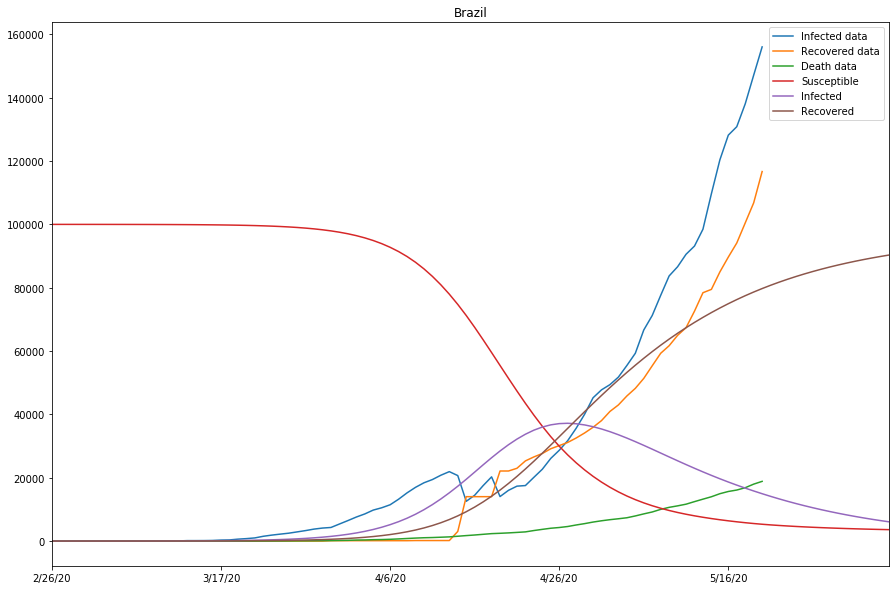

In [179]:
brazil_df, brazil_fig = brazil_learner.train()

#### Graficamos la predicción

In [180]:
brazil_sir = brazil_df[:77]

In [191]:
def plot_sir_prediction(title, df_sir, remove_series=[],yaxis_type="", yaxis_title=""):
    fig = go.Figure()
    title = title
    labels = ['Infected data','Recovered data', 'Death data', 'Susceptible','Infected','Recovered']
    colors = [color_arr[0], color_arr[8], color_arr[2], color_arr[3],color_arr[7], color_arr[16]]
    line_size = [2, 2, 2, 2, 2, 2]
    
    for index, data_series in enumerate(labels):
        if data_series not in remove_series:
            fig.add_trace(go.Scatter(x=df_sir.index, 
                                           y = df_sir[data_series], 
                                           name = labels[index],
                                           line=dict(
                                               color=colors[index], 
                                               width=line_size[index]),
                                           connectgaps=True,))
    xaxis= dict(
        title = "Fechas",
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickangle = 280,
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',),)
    yaxis = dict(
        title = "Conteo de casos",
        showline = True,
        showgrid = True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,)
    
    if yaxis_type!="":
        yaxis['type'] = yaxis_type
    
    if yaxis_title !="":
        yaxis['title'] = yaxis_title
    
    fig.update_layout(
        xaxis = xaxis,
        yaxis = yaxis,
        autosize=True,
        margin=dict(autoexpand=True,l=100,r=20,t=110,),
        showlegend=True)

    annotations = []

    # Title
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=title,
                              font=dict(family='Arial',
                                        size=16,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

    fig.update_layout(annotations=annotations)
    
    return fig
    

#### Modelo -- Propagación Covid-19  -- Predicción -- BRASIL

In [192]:
fig_8 = plot_sir_prediction(title="Modelo SIR -- Propagación Covid-19 -- Predicción -- BRASIL", df_sir= brazil_sir)
fig_8.show()

In [193]:
# to remove the "Susceptible" series just pass the series name to remove_series
fig_8 = plot_sir_prediction(
    title="Modelo SIR -- Propagación Covid-19 -- Predicción -- BRASIL", 
    df_sir= brazil_sir,
    remove_series=['Susceptible'])

fig_8.show()


#### Modelo SIR Model --  Propagación Covid-19 -- Predicción -- BRASIL | Case Count (Log Scale)

In [194]:
fig_9 = plot_sir_prediction(
    title="Modelo SIR -- Propagación Covid-19 -- Predicción -- BRASIL", 
    df_sir= brazil_sir,
    remove_series=['Susceptible'],
    yaxis_type="log",
    yaxis_title="Case Count (Log Scale)")

fig_9.show()